In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [2]:
df = pd.read_csv("Knowledge_base_train.csv")

In [3]:
df.head()

,class,num_clients,Sum of Instances in Clients,Max. Of Instances in Clients,Min. Of Instances in Clients,Stddev of Instances in Clients,Average Dataset Missing Values %,Min Dataset Missing Values %,Max Dataset Missing Values %,Stddev Dataset Missing Values %,...,Min No. Of Insignificant Lags in Target,Stddev No. Of Insignificant Lags in Target,Avg. No. Of Seasonality Components in Target,Max No. Of Seasonality Components in Target,Min No. Of Seasonality Components in Target,Stddev No. Of Seasonality Components in Target,Average Fractal Dimensionality Across Clients of Target,Maximum Period of Seasonality Components in Target Across Clients,Minimum Period of Seasonality Components in Target Across Clients,Entropy of Target Stationarity
0,XGBRegressor,10,13821,1383,1382,0.300000,4.992466,4.121475,5.571635,0.448970,...,0,0,2,2,2,0,0.009829,13,2,0.325083
1,XGBRegressor,5,4031,807,806,0.400000,4.762946,3.970223,6.203474,0.875041,...,0,0,0,0,0,0,0.033774,0,0,0.673012
2,HUBERREGRESSOR,5,17280,3456,3456,0.000000,5.104167,4.745370,5.295139,0.188945,...,2,0,0,0,0,0,0.017802,0,0,0.673012
3,LinearSVR,5,6911,1383,1382,0.400000,4.934113,4.052098,5.571635,0.524086,...,1,0,0,0,0,0,0.390252,0,0,0.000000
4,XGBRegressor,15,24181,1613,1612,0.249444,4.966717,3.535980,6.389578,0.693981,...,0,0,1,1,1,0,0.014879,4,4,0.392674


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_clients,400.0,10.212500,5.346851,5.000000,5.000000,10.000000,15.000000,20.000000
Sum of Instances in Clients,400.0,20298.622500,11876.943055,4031.000000,10361.000000,17280.000000,31101.000000,42046.000000
Max. Of Instances in Clients,400.0,2318.435000,1730.936415,807.000000,1152.000000,1728.000000,2804.000000,8410.000000
Min. Of Instances in Clients,400.0,2317.722500,1730.913015,806.000000,1152.000000,1728.000000,2803.000000,8409.000000
Stddev of Instances in Clients,400.0,0.232671,0.159973,0.000000,0.000000,0.300000,0.400000,0.489898
Average Dataset Missing Values %,400.0,4.851901,0.857083,0.000000,4.947917,4.994080,5.051492,5.260417
Min Dataset Missing Values %,400.0,4.127425,0.815462,0.000000,3.957529,4.282531,4.535038,4.973775
Max Dataset Missing Values %,400.0,5.621425,1.056942,0.000000,5.466327,5.738657,6.068289,7.091172
Stddev Dataset Missing Values %,400.0,0.451183,0.199159,0.000000,0.310345,0.453950,0.573496,1.139840
Average Target Missing Values %,400.0,4.851878,0.857212,0.000000,4.947917,4.994080,5.051492,5.260417


#### Let's explore some of the standing out features

In [5]:
df["Stddev No. Of Insignificant Lags in Target"].value_counts()

Stddev No. Of Insignificant Lags in Target
0    400
Name: count, dtype: int64

In [6]:
df["Stddev No. Of Seasonality Components in Target"].value_counts()

Stddev No. Of Seasonality Components in Target
0    400
Name: count, dtype: int64

In [7]:
df["Stddev No. Of Symbols per Categorical Features"].value_counts()

Stddev No. Of Symbols per Categorical Features
0    400
Name: count, dtype: int64

In [8]:
df["Stddev No. Of Significant Lags in Target"].value_counts()

Stddev No. Of Significant Lags in Target
0    400
Name: count, dtype: int64

In [9]:
df = df.drop(['Stddev No. Of Insignificant Lags in Target', 
             'Stddev No. Of Seasonality Components in Target',
             'Stddev No. Of Symbols per Categorical Features',
             'Stddev No. Of Significant Lags in Target'], axis=1)

- These four features all have the same value, so they will not contribute to distinguishing between the classes and thus they were removed.

In [10]:
df["Maximum Period of Seasonality Components in Target Across Clients"].nlargest(100)

89     7604
308    6911
9      4205
167    4205
194    3802
       ... 
32        0
33        0
34        0
35        0
37        0
Name: Maximum Period of Seasonality Components in Target Across Clients, Length: 100, dtype: int64

In [11]:
df["Minimum Period of Seasonality Components in Target Across Clients"].nlargest(100)

308    6911
294    3456
299    3455
278    2102
347    2073
       ... 
32        0
33        0
34        0
35        0
37        0
Name: Minimum Period of Seasonality Components in Target Across Clients, Length: 100, dtype: int64

- some of the numerical features spike highly with the majority of values in its distribution being zero, i will check all numerical features for skewness.

In [12]:
from scipy.stats import skew

# Calculate skewness for all features
skewness = df.iloc[:, 1:].apply(skew)

# Identify highly skewed features
highly_skewed_positive = skewness[skewness > 1].index.tolist()
highly_skewed_negative = skewness[skewness < -1].index.tolist()

In [13]:
highly_skewed_positive

['Max. Of Instances in Clients',
 'Min. Of Instances in Clients',
 'No. Of Features',
 'No. Of Numerical Features',
 'No. Of Categorical Features',
 'Sampling Rate',
 'Minimum Skewness of Numerical Features',
 'Average Kurtosis of Numerical Features',
 'Minimum Kurtosis of Numerical Features',
 'Stddev Kurtosis of Numerical Features',
 'Avg No. of Symbols per Categorical Features',
 'Min. No. Of Symbols per Categorical Features',
 'Max. No. Of Symbols per Categorical Features',
 'Avg No. Of Stationary Features',
 'Min No. Of Stationary Features',
 'Stddev No. Of Stationary Features',
 'Avg No. Of Stationary Features after 2nd order',
 'Min No. Of Stationary Features after 2nd order',
 'Max No. Of Stationary Features after 2nd order',
 'Stddev No. Of Stationary Features after 2nd order',
 'Avg No. Of Insignificant Lags in Target',
 'Max No. Of Insignificant Lags in Target',
 'Min No. Of Insignificant Lags in Target',
 'Avg. No. Of Seasonality Components in Target',
 'Max No. Of Seasonal

In [14]:
highly_skewed_negative

['Average Dataset Missing Values %',
 'Min Dataset Missing Values %',
 'Max Dataset Missing Values %',
 'Average Target Missing Values %',
 'Min Target Missing Values %',
 'Max Target Missing Values %']

- A significant portion of the features exhibit positive or negative skewness. To address this, I apply log transformation to positively skewed data and power transformation (e.g., squaring) to negatively skewed data. These transformations help reduce the impact of extreme values (large or small) while preserving the relative differences between data points.

In [15]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df,
    test_size=0.15,
    random_state=42,
    stratify=df['class']  # Stratified sampling to ensure class balance
)

# Further split train into train and calibration sets=
train_df, calibration_df = train_test_split(
    train_df,
    test_size=0.175,
    random_state=42,
    stratify=train_df['class']
)


In [16]:
len(train_df), len(calibration_df), len(test_df)

(280, 60, 60)

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
import numpy as np
import pandas as pd
from scipy.stats import skew

# Define the function to handle skewness
def handle_skewness(X):
    X = pd.DataFrame(X, columns=numeric_features) 
    for col in X.columns:
        col_skewness = skew(X[col])
        if col_skewness > 1:  # Highly positively skewed
            X[col] = np.log1p(X[col])
        elif col_skewness < -1:  # Highly negatively skewed
            X[col] = X[col] ** 2
    return X

# Build the pipeline
def build_pipeline(numeric_features):
    return ColumnTransformer(
        transformers=[
            # Handle skewness and scale all numerical features
            ('numeric', Pipeline([
                #('skew_handler', FunctionTransformer(handle_skewness, validate=False)),
                ('scaler', StandardScaler())
            ]), numeric_features)
        ]
    )


In [18]:
# Separate features and targets
target_col = train_df.columns[0]
numeric_features = train_df.columns[1:]

X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

X_calibration = calibration_df.drop(columns=[target_col])
y_calibration = calibration_df[target_col]

X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

preprocessor = build_pipeline(numeric_features)

# Fit and transform the training set
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform calibration and test sets
X_calibration_transformed = preprocessor.transform(X_calibration)
X_test_transformed = preprocessor.transform(X_test)

# One-hot encode the target
encoder = OneHotEncoder(sparse_output=False)

y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_calibration_encoded = encoder.transform(y_calibration.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

<span style="color: blue; font-size: 20px;">**Skewness transformation actually made all the models perform consistently worse in terms of classification performance, I am not sure why but I am commenting it out for now.**</span>


In [19]:
# Retrieve and print the mapping
class_labels = encoder.categories_[0]
print("Class Labels Mapping:")
print(class_labels)

Class Labels Mapping:
['ELASTICNETCV' 'HUBERREGRESSOR' 'LASSO' 'LinearSVR' 'QUANTILEREGRESSOR'
 'XGBRegressor']


## Model Selection

### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],            
    'min_samples_split': [2, 5, 10],          
    'min_samples_leaf': [1, 2, 4],            
}

# Initialize the random forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5, 
                           verbose=2, 
                           n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train_transformed, y_train_encoded.argmax(axis=1))

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf_clf = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters from GridSearch:")
print(best_params)

# Make predictions with the tuned model
y_pred_rf_tuned = best_rf_clf.predict(X_test_transformed)

# Evaluate the tuned model
print("Tuned Random Forest Classification Report:")
print(classification_report(y_test_encoded.argmax(axis=1), y_pred_rf_tuned))
print(f"Accuracy: {accuracy_score(y_test_encoded.argmax(axis=1), y_pred_rf_tuned)}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters from GridSearch:
{'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.62      0.62      0.62        13
           2       0.50      0.29      0.36         7
           3       0.38      0.30      0.33        10
           4       0.00      0.00      0.00         2
           5       0.74      0.93      0.82        27

    accuracy                           0.63        60
   macro avg       0.37      0.35      0.36        60
weighted avg       0.59      0.63      0.60        60

Accuracy: 0.6333333333333333


C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

### Gradient Boosting

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],      
    'n_estimators': [50, 75, 100],          
    'max_depth': [3, 5, None],                  
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gb_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train_transformed, y_train_encoded.argmax(axis=1))

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_gb_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters from GridSearch:")
print(best_params)

# Make predictions with the tuned model
y_pred_gb_tuned = best_gb_model.predict(X_test_transformed)

# Evaluate the tuned model
print("Tuned Gradient Boosting Classification Report:")
print(classification_report(y_test_encoded.argmax(axis=1), y_pred_gb_tuned))
print(f"Accuracy: {accuracy_score(y_test_encoded.argmax(axis=1), y_pred_gb_tuned)}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters from GridSearch:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Tuned Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.62      0.62      0.62        13
           2       0.44      0.57      0.50         7
           3       0.20      0.10      0.13        10
           4       0.00      0.00      0.00         2
           5       0.79      0.96      0.87        27

    accuracy                           0.65        60
   macro avg       0.34      0.37      0.35        60
weighted avg       0.57      0.65      0.60        60

Accuracy: 0.65


C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid with compatibility adjustments
param_grid = [
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs'], 'max_iter': [100, 200, 500]},
    {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear'], 'max_iter': [100, 200, 500]},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10], 'solver': ['saga'], 'l1_ratio': [0.1, 0.5, 0.9], 'max_iter': [100, 200, 500]},
    {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['saga'], 'max_iter': [100, 200, 500]}
]


# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_reg,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train_transformed, y_train_encoded.argmax(axis=1))

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_log_reg = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters from GridSearch:")
print(best_params)

# Make predictions with the tuned model
y_pred_log_reg = best_log_reg.predict(X_test_transformed)

# Evaluate the tuned model
print("Tuned Logistic Regression Classification Report:")
print(classification_report(y_test_encoded.argmax(axis=1), y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test_encoded.argmax(axis=1), y_pred_log_reg)}")


Fitting 5 folds for each of 96 candidates, totalling 480 fits


C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters from GridSearch:
{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Tuned Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.58      0.54      0.56        13
           2       0.43      0.43      0.43         7
           3       0.43      0.30      0.35        10
           4       0.00      0.00      0.00         2
           5       0.74      0.93      0.82        27

    accuracy                           0.63        60
   macro avg       0.36      0.37      0.36        60
weighted avg       0.58      0.63      0.60        60

Accuracy: 0.6333333333333333


C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

### Neural Network with class imbalance handling techniques
- I only use class imbalance handling techniques with the neural network as it boosted the results. But when i used them (smote and/or class weighting) with the classical machine learning algorithms above, it had zero effect on the classification performance of the minority classes (0 and 4) and reduced the classification performance on the other classes.

In [23]:
from sklearn.utils.class_weight import compute_class_weight


# Assuming `y_train` is the target column in the training dataset
classes = np.unique(y_train_encoded.argmax(axis=1))  # Unique classes in y_train
class_weights = compute_class_weight('balanced', classes=classes, y=y_train_encoded.argmax(axis=1))

# Convert to a dictionary for easy use in model training
class_weight_dict = {cls: weight for cls, weight in zip(classes, class_weights)}
class_weight_dict

{0: 11.666666666666666,
 1: 0.7909604519774012,
 2: 1.4583333333333333,
 3: 0.9523809523809523,
 4: 3.888888888888889,
 5: 0.3763440860215054}

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=3)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_transformed, y_train_encoded.argmax(axis=1))
y_train_balanced = tf.keras.utils.to_categorical(y_train_balanced)

from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_transformed.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(y_train_encoded.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train_balanced,
    y_train_balanced,
    epochs=700,
    batch_size=64,
    validation_split=0.15,
    class_weight=class_weight_dict,
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_transformed, y_test_encoded, verbose=0)
y_pred_nn = model.predict(X_test_transformed)
y_pred_labels_nn = np.argmax(y_pred_nn, axis=1)
classification_report_nn = classification_report(np.argmax(y_test_encoded, axis=1), y_pred_labels_nn)

Epoch 1/700


C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2210 - loss: 6.8163 - val_accuracy: 0.0000e+00 - val_loss: 3.9304
Epoch 2/700
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2760 - loss: 5.4752 - val_accuracy: 0.0000e+00 - val_loss: 4.1913
Epoch 3/700
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2603 - loss: 4.6839 - val_accuracy: 0.0000e+00 - val_loss: 4.1814
Epoch 4/700
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2753 - loss: 4.4055 - val_accuracy: 0.3125 - val_loss: 3.9466
Epoch 5/700
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2993 - loss: 4.0275 - val_accuracy: 0.3393 - val_loss: 3.6596
Epoch 6/700
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3233 - loss: 3.7837 - val_accuracy: 0.3393 - val_loss: 3.4859
Epoch 7/700
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3630 - loss: 3.6065 - val_accuracy: 0.3393 - val_loss: 3.3879
Epoch 8/700
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3577 - loss: 3.5721 - val_accuracy: 0.3393 - 

C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [25]:
print(test_accuracy)
print(classification_report_nn)

0.6166666746139526
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.62      0.62      0.62        13
           2       0.36      0.57      0.44         7
           3       0.27      0.30      0.29        10
           4       0.00      0.00      0.00         2
           5       0.96      0.81      0.88        27

    accuracy                           0.62        60
   macro avg       0.37      0.38      0.37        60
weighted avg       0.65      0.62      0.63        60



## Calibration

### Calibration Error Estimation and Visualization

In [26]:
def calculate_bin_stats_and_ece(probabilities, true_labels, num_bins=10):
    """
    Calculate bin stats (accuracies and confidences) and Expected Calibration Error (ECE).
    """
    predicted_classes = np.argmax(probabilities, axis=1)
    confidence = np.max(probabilities, axis=1)
    bins = np.linspace(0, 1, num_bins + 1)
    bin_indices = np.digitize(confidence, bins, right=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    accuracies = []
    confidences = []
    ece = 0.0

    for i in range(1, num_bins + 1):
        bin_mask = bin_indices == i
        bin_count = np.sum(bin_mask)

        if bin_count > 0:
            avg_confidence = np.mean(confidence[bin_mask])
            accuracy = np.mean(predicted_classes[bin_mask] == true_labels[bin_mask])

            accuracies.append(accuracy)
            confidences.append(avg_confidence)

            ece += (bin_count / len(true_labels)) * np.abs(accuracy - avg_confidence)
        else:
            accuracies.append(0)
            confidences.append(0)

    return bin_centers, np.array(accuracies), np.array(confidences), ece

In [27]:
def calibration_plot(probabilities, true_labels, algorithm, num_bins=10):
    """
    Improved calibration plot to compare accuracy and confidence.
    """

    bin_centers, accuracies, confidences, _ = calculate_bin_stats_and_ece(probabilities, true_labels)
    
    # Plot observed accuracy and confidence for each bin
    plt.figure(figsize=(8, 6))
    plt.bar(bin_centers, accuracies, width=0.08, color="blue", alpha=0.7, label="Outputs (Accuracy)", align='center')
    plt.bar(bin_centers, confidences - accuracies, bottom=accuracies, width=0.08, color="pink", alpha=0.5, label="Gap (Calibration Error)", align='center')
    plt.plot([0, 1], [0, 1], "k--", label="Perfect Calibration")  # Diagonal line

    # Set bin centers as x-ticks
    plt.xticks(bin_centers, labels=[f"{center:.2f}" for center in bin_centers])
    plt.xlabel("Confidence")
    plt.ylabel("Accuracy")
    plt.title(f"Calibration Plot of {algorithm}")
    plt.legend(loc="upper left")
    plt.show()

In [28]:
from tabulate import tabulate
import matplotlib.pyplot as plt

### Random Forest

Random Forest ECE: 0.1374499699374699
+------------+--------------+
|   Accuracy |   Confidence |
+============+==============+
|   0        |     0        |
+------------+--------------+
|   0        |     0        |
+------------+--------------+
|   0        |     0        |
+------------+--------------+
|   0.25     |     0.376752 |
+------------+--------------+
|   0.388889 |     0.447356 |
+------------+--------------+
|   0.833333 |     0.542148 |
+------------+--------------+
|   1        |     0.635314 |
+------------+--------------+
|   0.875    |     0.747405 |
+------------+--------------+
|   1        |     0.835592 |
+------------+--------------+
|   1        |     0.967077 |
+------------+--------------+


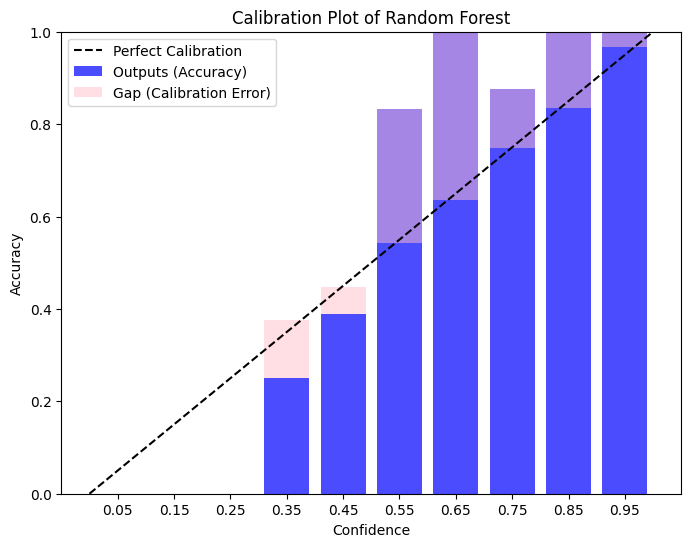

In [29]:
# Random Forest Calibration Error
rf_probabilities = best_rf_clf.predict_proba(X_test_transformed)
_, accuracies, confidences, rf_ece = calculate_bin_stats_and_ece(rf_probabilities, y_test_encoded.argmax(axis=1))
print(f"Random Forest ECE: {rf_ece}")
data = zip(accuracies, confidences)
headers = ["Accuracy", "Confidence"]
# Print as a table
print(tabulate(data, headers=headers, tablefmt="grid"))


calibration_plot(rf_probabilities, y_test_encoded.argmax(axis=1), "Random Forest")

### Gradient Boosting

Gradient Boosting ECE: 0.1418685304915463
+------------+--------------+
|   Accuracy |   Confidence |
+============+==============+
|   0        |     0        |
+------------+--------------+
|   0        |     0        |
+------------+--------------+
|   0        |     0        |
+------------+--------------+
|   0        |     0.384469 |
+------------+--------------+
|   0.4      |     0.444085 |
+------------+--------------+
|   0.571429 |     0.557586 |
+------------+--------------+
|   0.5      |     0.626805 |
+------------+--------------+
|   0.5      |     0.753734 |
+------------+--------------+
|   0.444444 |     0.850471 |
+------------+--------------+
|   1        |     0.96872  |
+------------+--------------+


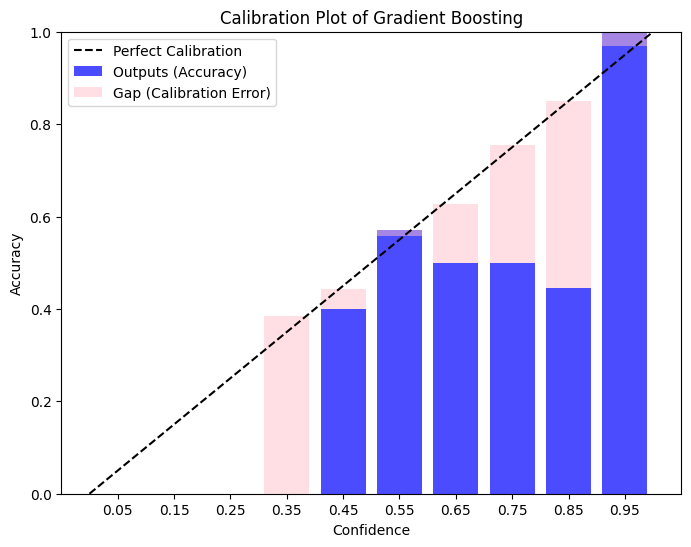

In [30]:
# Gradient Boosting Calibration Error
gb_probabilities = best_gb_model.predict_proba(X_test_transformed)
_, accuracies, confidences, gb_ece = calculate_bin_stats_and_ece(gb_probabilities, y_test_encoded.argmax(axis=1))
print(f"Gradient Boosting ECE: {gb_ece}")
data = zip(accuracies, confidences)
headers = ["Accuracy", "Confidence"]
print(tabulate(data, headers=headers, tablefmt="grid"))


calibration_plot(gb_probabilities, y_test_encoded.argmax(axis=1), "Gradient Boosting")

### Logistic Regression

Logistic Regression ECE: 0.10311423215717465
+------------+--------------+
|   Accuracy |   Confidence |
+============+==============+
|   0        |     0        |
+------------+--------------+
|   0        |     0        |
+------------+--------------+
|   0.5      |     0.276237 |
+------------+--------------+
|   0.428571 |     0.357006 |
+------------+--------------+
|   0.4      |     0.453769 |
+------------+--------------+
|   0.555556 |     0.550041 |
+------------+--------------+
|   0.75     |     0.642396 |
+------------+--------------+
|   1        |     0.755485 |
+------------+--------------+
|   1        |     0.844887 |
+------------+--------------+
|   0.666667 |     0.920027 |
+------------+--------------+


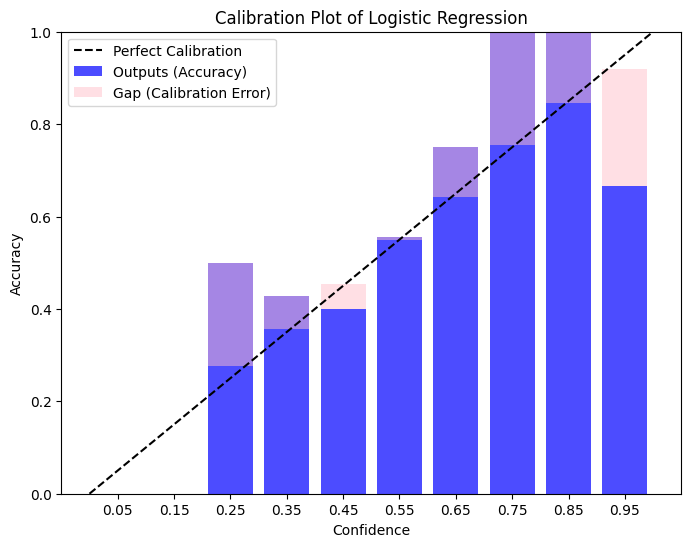

In [31]:
# Logistic Regression Calibration Error
log_reg_probabilities = best_log_reg.predict_proba(X_test_transformed)
_, accuracies, confidences, log_reg_ece = calculate_bin_stats_and_ece(log_reg_probabilities, y_test_encoded.argmax(axis=1))
print(f"Logistic Regression ECE: {log_reg_ece}")
data = zip(accuracies, confidences)
headers = ["Accuracy", "Confidence"]
print(tabulate(data, headers=headers, tablefmt="grid"))

calibration_plot(log_reg_probabilities, y_test_encoded.argmax(axis=1), "Logistic Regression")

### Neural Networks

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Neural Network ECE: 0.20961858381827675
+------------+--------------+
|   Accuracy |   Confidence |
+============+==============+
|   0        |     0        |
+------------+--------------+
|   0        |     0        |
+------------+--------------+
|   0        |     0        |
+------------+--------------+
|   0        |     0.383723 |
+------------+--------------+
|   0.5      |     0.446524 |
+------------+--------------+
|   0.5      |     0.536506 |
+------------+--------------+
|   0.333333 |     0.634165 |
+------------+--------------+
|   0.333333 |     0.752949 |
+------------+--------------+
|   0.666667 |     0.845011 |
+------------+--------------+
|   0.764706 |     0.967727 |
+------------+--------------+


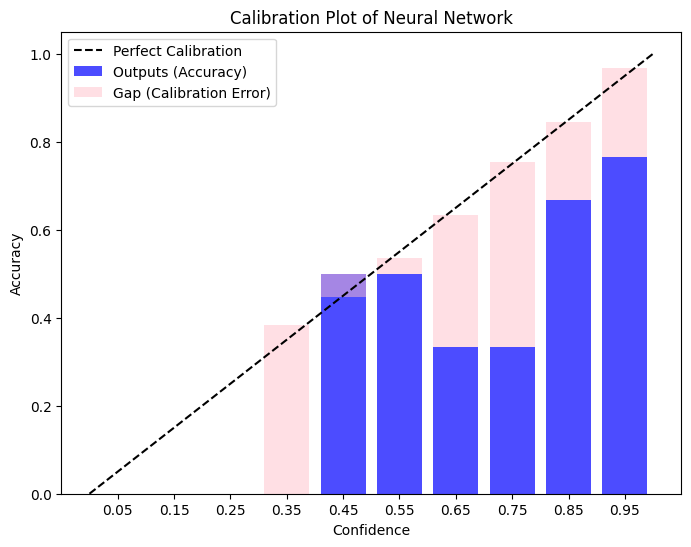

In [32]:
# Neural Network Calibration Error
nn_probabilities = model.predict(X_test_transformed)
_, accuracies, confidences, nn_ece = calculate_bin_stats_and_ece(nn_probabilities, y_test_encoded.argmax(axis=1))
print(f"Neural Network ECE: {nn_ece}")
data = zip(accuracies, confidences)
headers = ["Accuracy", "Confidence"]
print(tabulate(data, headers=headers, tablefmt="grid"))

calibration_plot(nn_probabilities, y_test_encoded.argmax(axis=1), "Neural Network")

### Model Calibration Experiments

In [33]:
from sklearn.calibration import CalibratedClassifierCV

In [34]:
import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import log_loss

class TemperatureScaler:
    def __init__(self):
        self.temperature = None

    def fit(self, logits, y_true):
        # Define the loss function for optimization
        def temperature_loss(temp):
            temp_logits = logits / temp
            probs = np.exp(temp_logits) / np.sum(np.exp(temp_logits), axis=1, keepdims=True)
            return log_loss(y_true, probs)
        
        # Optimize temperature
        self.temperature = minimize(temperature_loss, x0=1.0, bounds=[(0.1, 10)]).x[0]

    def predict_proba(self, logits):
        # Apply temperature scaling
        scaled_logits = logits / self.temperature
        return np.exp(scaled_logits) / np.sum(np.exp(scaled_logits), axis=1, keepdims=True)


### Random Forest

In [35]:
# Apply calibration to the Random Forest model using calibration set
calibrated_rf_clf = CalibratedClassifierCV(best_rf_clf, method='isotonic')

calibrated_rf_clf.fit(X_calibration_transformed, y_calibration_encoded.argmax(axis=1))

# Predict probabilities and evaluate calibration
y_proba_rf_calibrated = calibrated_rf_clf.predict_proba(X_test_transformed)
y_pred_rf_calibrated = calibrated_rf_clf.predict(X_test_transformed)

# Evaluate the calibrated model on the test set
print("Calibrated Random Forest Classification Report (Test Set):")
print(classification_report(y_test_encoded.argmax(axis=1), y_pred_rf_calibrated))
print(f"Accuracy: {accuracy_score(y_test_encoded.argmax(axis=1), y_pred_rf_calibrated)}")

# Calculate and print ECE
_, accuracies, confidences, rf_ece = calculate_bin_stats_and_ece(y_proba_rf_calibrated, y_test_encoded.argmax(axis=1))
print(f"Test Set Calibrated Random Forest ECE: {rf_ece}")

y_proba_rf_calib_set = calibrated_rf_clf.predict_proba(X_calibration_transformed)
_, calib_accuracies, calib_confidences, calib_rf_ece = calculate_bin_stats_and_ece(y_proba_rf_calib_set, y_calibration_encoded.argmax(axis=1))
print(f"Calibration Set Random Forest ECE: {calib_rf_ece}")

C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Calibrated Random Forest Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.55      0.46      0.50        13
           2       0.00      0.00      0.00         7
           3       0.31      0.40      0.35        10
           4       0.00      0.00      0.00         2
           5       0.76      0.81      0.79        27

    accuracy                           0.53        60
   macro avg       0.27      0.28      0.27        60
weighted avg       0.51      0.53      0.52        60

Accuracy: 0.5333333333333333
Test Set Calibrated Random Forest ECE: 0.09732644144161329
Calibration Set Random Forest ECE: 0.28179848767221954


C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

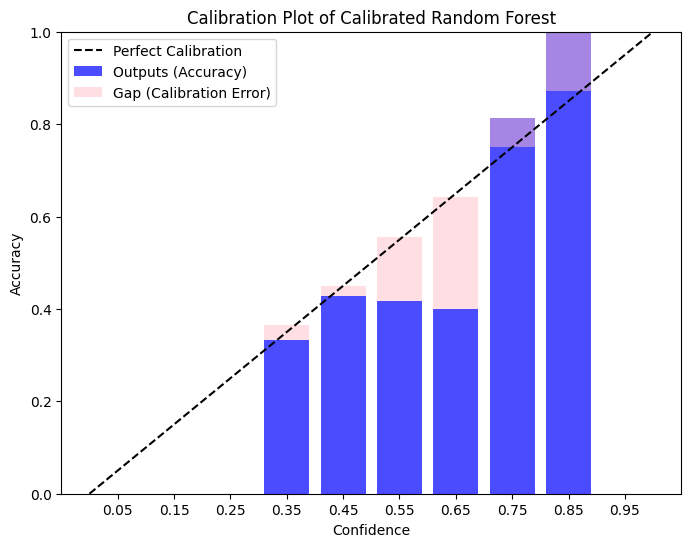

In [36]:
# Calibration plot for test set
calibration_plot(y_proba_rf_calibrated, y_test_encoded.argmax(axis=1), "Calibrated Random Forest")

- When i tried the sigmoid fucntion, it produced much worse results (both calibration and test set). isotonic also did not overfit, despite having a small dataset.
- **sigmoid results:**
- Accuracy: 0.5333333333333333
- Test Set Calibrated Random Forest ECE: 0.15223990267111054
- Calibration Set Random Forest ECE: 0.47508456930986487
  
**the isotonic calibrating boosted the ece on the test set from 0.13 to 0.09**


### Gradient Boosting

In [37]:
# Calibrate the Gradient Boosting model using the calibration set
calibrated_gb_clf = CalibratedClassifierCV(best_gb_model, method='isotonic')  # or method='sigmoid'
calibrated_gb_clf.fit(X_calibration_transformed, y_calibration_encoded.argmax(axis=1))

# Predict probabilities and evaluate calibration on the test set
y_proba_gb_calibrated = calibrated_gb_clf.predict_proba(X_test_transformed)
y_pred_gb_calibrated = calibrated_gb_clf.predict(X_test_transformed)

# Evaluate the calibrated Gradient Boosting model
print("Calibrated Gradient Boosting Classification Report (Test Set):")
print(classification_report(y_test_encoded.argmax(axis=1), y_pred_gb_calibrated))
print(f"Accuracy: {accuracy_score(y_test_encoded.argmax(axis=1), y_pred_gb_calibrated)}")

# Calculate and print ECE
_, gb_accuracies, gb_confidences, gb_ece = calculate_bin_stats_and_ece(y_proba_gb_calibrated, y_test_encoded.argmax(axis=1))
print(f"Test Set Calibrated Gradient Boosting ECE: {gb_ece}")

# Evaluate the calibration set performance
y_proba_gb_calib_set = calibrated_gb_clf.predict_proba(X_calibration_transformed)
_, calib_accuracies_gb, calib_confidences_gb, calib_gb_ece = calculate_bin_stats_and_ece(y_proba_gb_calib_set, y_calibration_encoded.argmax(axis=1))
print(f"Calibration Set Gradient Boosting ECE: {calib_gb_ece}")

C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Calibrated Gradient Boosting Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.60      0.46      0.52        13
           2       0.00      0.00      0.00         7
           3       0.20      0.20      0.20        10
           4       0.00      0.00      0.00         2
           5       0.67      0.89      0.76        27

    accuracy                           0.53        60
   macro avg       0.24      0.26      0.25        60
weighted avg       0.46      0.53      0.49        60

Accuracy: 0.5333333333333333
Test Set Calibrated Gradient Boosting ECE: 0.18120070781011263
Calibration Set Gradient Boosting ECE: 0.26226507507517366


C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

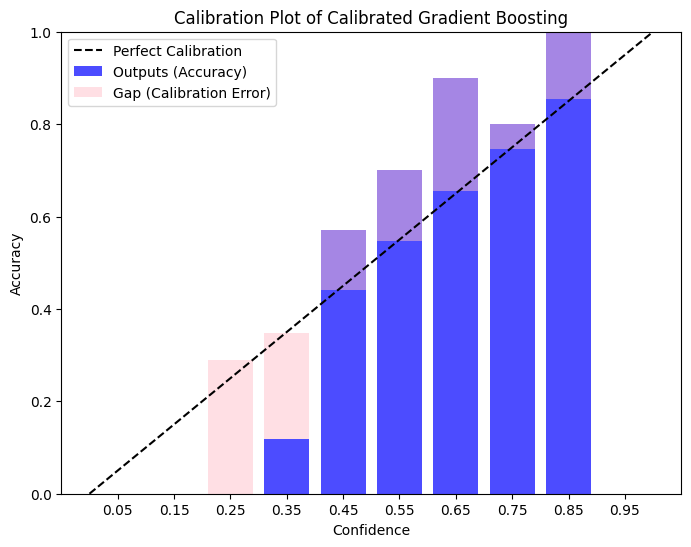

In [38]:
# Calibration plot for test set
calibration_plot(y_proba_gb_calibrated, y_test_encoded.argmax(axis=1), "Calibrated Gradient Boosting")

- using sigmoid here lowered the accuracy more than isotonic, and it produced a significantly higher calibration ece with no change to the test ece.
- **sigmoid results**:
- Accuracy: 0.48333333333333334
- Test Set Calibrated Gradient Boosting ECE: 0.1840638265056219
- Calibration Set Gradient Boosting ECE: 0.39838564769301366/

**but even the isotonic function produced worse ece (0.18) than the original uncalibrated model (0.14), and it generally shifted the output from being modtly overconfident to mostly underconfident.**

### Let's try temprature scaling instead

In [39]:
# Fit temperature scaling on logits
logits_train = best_gb_model.decision_function(X_calibration_transformed)  # Raw logits from the model
y_train_true = y_calibration_encoded.argmax(axis=1)

# Apply temperature scaling
scaler = TemperatureScaler()
scaler.fit(logits_train, y_train_true)

# Predict probabilities with scaled logits for the test set
logits_test = best_gb_model.decision_function(X_test_transformed)
probs_test_calibrated = scaler.predict_proba(logits_test)

# Evaluate calibration and classification performance on the test set
y_pred_calibrated = np.argmax(probs_test_calibrated, axis=1)
print("Accuracy after Temperature Scaling (Test Set):", accuracy_score(y_test_encoded.argmax(axis=1), y_pred_calibrated))
print("Classification Report after Temperature Scaling (Test Set):")
print(classification_report(y_test_encoded.argmax(axis=1), y_pred_calibrated))

# Calculate and print ECE for the test set
_, gb_accuracies, gb_confidences, gb_ece = calculate_bin_stats_and_ece(probs_test_calibrated, y_test_encoded.argmax(axis=1))
print(f"Test Set Calibrated Gradient Boosting ECE (Temperature Scaling): {gb_ece}")

# Evaluate calibration performance on the calibration set (use TemperatureScaler)
probs_calibration_calibrated = scaler.predict_proba(logits_train)
_, calib_accuracies, calib_confidences, calib_gb_ece = calculate_bin_stats_and_ece(probs_calibration_calibrated, y_calibration_encoded.argmax(axis=1))
print(f"Calibration Set Gradient Boosting ECE (Temperature Scaling): {calib_gb_ece}")

Accuracy after Temperature Scaling (Test Set):

C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 0.65
Classification Report after Temperature Scaling (Test Set):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.62      0.62      0.62        13
           2       0.44      0.57      0.50         7
           3       0.20      0.10      0.13        10
           4       0.00      0.00      0.00         2
           5       0.79      0.96      0.87        27

    accuracy                           0.65        60
   macro avg       0.34      0.37      0.35        60
weighted avg       0.57      0.65      0.60        60

Test Set Calibrated Gradient Boosting ECE (Temperature Scaling): 0.17701488426914996
Calibration Set Gradient Boosting ECE (Temperature Scaling): 0.133072201549177


C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- Temprature scaling fit the calibration set better but the test calibration only slightly improved.

### Logistic Regression

In [40]:
# Calibrate the Logistic Regression model using the calibration set
calibrated_log_reg_clf = CalibratedClassifierCV(best_log_reg, method='isotonic')
calibrated_log_reg_clf.fit(X_calibration_transformed, y_calibration_encoded.argmax(axis=1))

# Predict probabilities and evaluate calibration on the test set
y_proba_log_reg_calibrated = calibrated_log_reg_clf.predict_proba(X_test_transformed)
y_pred_log_reg_calibrated = calibrated_log_reg_clf.predict(X_test_transformed)

# Evaluate the calibrated Logistic Regression model
print("Calibrated Logistic Regression Classification Report (Test Set):")
print(classification_report(y_test_encoded.argmax(axis=1), y_pred_log_reg_calibrated))
print(f"Accuracy: {accuracy_score(y_test_encoded.argmax(axis=1), y_pred_log_reg_calibrated)}")

# Calculate and print ECE
_, log_reg_accuracies, log_reg_confidences, log_reg_ece = calculate_bin_stats_and_ece(
    y_proba_log_reg_calibrated, y_test_encoded.argmax(axis=1)
)
print(f"Test Set Calibrated Logistic Regression ECE: {log_reg_ece}")

# Evaluate the calibration set performance
y_proba_log_reg_calib_set = calibrated_log_reg_clf.predict_proba(X_calibration_transformed)
_, calib_accuracies_log_reg, calib_confidences_log_reg, calib_log_reg_ece = calculate_bin_stats_and_ece(
    y_proba_log_reg_calib_set, y_calibration_encoded.argmax(axis=1)
)
print(f"Calibration Set Logistic Regression ECE: {calib_log_reg_ece}")

Calibrated Logistic Regression Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.45      0.38      0.42        13
           2       0.00      0.00      0.00         7
           3       0.50      0.30      0.38        10
           4       0.00      0.00      0.00         2
           5       0.57      0.74      0.65        27

    accuracy                           0.47        60
   macro avg       0.25      0.24      0.24        60
weighted avg       0.44      0.47      0.44        60

Accuracy: 0.4666666666666667
Test Set Calibrated Logistic Regression ECE: 0.14300183476482003
Calibration Set Logistic Regression ECE: 0.18655962952802746


C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Pyt

- using sigmoid here lowered the accuracy more than isotonic, and it produced a significantly higher calibration ece with slightly higher test ece.
- **sigmoid results**:
- Accuracy: 0.4166666666666667
- Test Set Calibrated Logistic Regression ECE: 0.1377322794067126
- Calibration Set Logistic Regression ECE: 0.2587237138654277

**but even the isotonic function produced worse ece (0.14) than the original uncalibrated model (0.10).**

### Let's try temprature scaling

In [41]:
logits_calibration = best_log_reg.decision_function(X_calibration_transformed)
y_calibration_true = y_calibration_encoded.argmax(axis=1)

# Apply temperature scaling
scaler = TemperatureScaler()
scaler.fit(logits_calibration, y_calibration_true)

# Predict probabilities with scaled logits for the test set
logits_test = best_log_reg.decision_function(X_test_transformed)
probs_test_calibrated = scaler.predict_proba(logits_test) 

# Evaluate calibration and classification performance on the test set
from sklearn.metrics import accuracy_score, classification_report

y_pred_calibrated = np.argmax(probs_test_calibrated, axis=1)
print("Accuracy after Temperature Scaling (Test Set):", accuracy_score(y_test_encoded.argmax(axis=1), y_pred_calibrated))
print("Classification Report after Temperature Scaling (Test Set):")
print(classification_report(y_test_encoded.argmax(axis=1), y_pred_calibrated))

# Calculate and print ECE for the test set
_, accuracies, confidences, ece_calibrated = calculate_bin_stats_and_ece(probs_test_calibrated, y_test_encoded.argmax(axis=1))
print(f"Test Set Calibrated Logistic Regression ECE (Temperature Scaling): {ece_calibrated}")

# Evaluate calibration performance on the calibration set
probs_calibration_calibrated = scaler.predict_proba(logits_calibration)  # Calibrated probabilities on calibration set
_, calib_accuracies, calib_confidences, calib_ece = calculate_bin_stats_and_ece(probs_calibration_calibrated, y_calibration_true)
print(f"Calibration Set Logistic Regression ECE (Temperature Scaling): {calib_ece}")


Accuracy after Temperature Scaling (Test Set): 0.6333333333333333
Classification Report after Temperature Scaling (Test Set):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.58      0.54      0.56        13
           2       0.43      0.43      0.43         7
           3       0.43      0.30      0.35        10
           4       0.00      0.00      0.00         2
           5       0.74      0.93      0.82        27

    accuracy                           0.63        60
   macro avg       0.36      0.37      0.36        60
weighted avg       0.58      0.63      0.60        60

Test Set Calibrated Logistic Regression ECE (Temperature Scaling): 0.1100227463439917
Calibration Set Logistic Regression ECE (Temperature Scaling): 0.10542278142113916


C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

- The temprature scaled model performed very similarly to the uncalibrated model, with only having a slightly lower test ece.

### Neural Network

In [42]:
# Create a new model that outputs logits
model_logits = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_transformed.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(y_train_encoded.shape[1])  # No activation (logits output)
])

# Transfer weights from the trained model
for layer_logits, layer_softmax in zip(model_logits.layers, model.layers):
    layer_logits.set_weights(layer_softmax.get_weights())

logits_calibration = model_logits.predict(X_calibration_transformed)
y_calibration_true = y_calibration_encoded.argmax(axis=1)

# Fit temperature scaler
scaler = TemperatureScaler()
scaler.fit(logits_calibration, y_calibration_true)

# Get logits for the test set
logits_test = model_logits.predict(X_test_transformed)

# Apply temperature scaling
probs_test_calibrated = scaler.predict_proba(logits_test)

# Evaluate calibration performance
from sklearn.metrics import accuracy_score, classification_report

y_pred_calibrated = np.argmax(probs_test_calibrated, axis=1)
print("Accuracy after Temperature Scaling (Test Set):", accuracy_score(y_test_encoded.argmax(axis=1), y_pred_calibrated))
print("Classification Report after Temperature Scaling (Test Set):")
print(classification_report(y_test_encoded.argmax(axis=1), y_pred_calibrated))

# Calculate and print ECE
_, accuracies, confidences, ece_calibrated = calculate_bin_stats_and_ece(probs_test_calibrated, y_test_encoded.argmax(axis=1))
print(f"Test Set Calibrated Neural Network ECE (Temperature Scaling): {ece_calibrated}")

# Evaluate calibration performance on the calibration set
probs_calibration_calibrated = scaler.predict_proba(logits_calibration)  # Calibrated probabilities on calibration set
_, calib_accuracies, calib_confidences, calib_ece = calculate_bin_stats_and_ece(probs_calibration_calibrated, y_calibration_true)
print(f"Calibration Set Neural Network ECE (Temperature Scaling): {calib_ece}")

C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Accuracy after Temperature Scaling (Test Set): 0.6166666666666667
Classification Report after Temperature Scaling (Test Set):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.62      0.62      0.62        13
           2       0.36      0.57      0.44         7
           3       0.27      0.30      0.29        10
           4       0.00      0.00      0.00         2
           5       0.96      0.81      0.88        27

    accuracy                           0.62        60
   macro avg       0.37      0.38      0.37        60
weighted avg       0.65      0.62      0.63        60

Test Set Calibrated Neural Network ECE (Temperature Scaling): 0.291094763080279
Calibration Set Neural Network ECE (Temperature Scaling): 0.20757550448179243


C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yara.mahfouz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

- The temprature scaling produced worse calibration error than the uncalibrated model.

## Final Model Selection
- The uncalibrated logistic regression performed best in terms of balancing the tradeof between the ece and classification performance. it had the bes test ece (0.1) among non-calibrated models and it was slighlty higher than the calibrated random forest model (0.09). but it had a significantly higher classification performance (63 compared to 53 in accuracy), which made it an overall better candidate.

In [43]:
import joblib

# Define file paths for saving
model_path = "logistic_regression_model.pkl"
preprocessor_path = "preprocessor.pkl"
encoder_path = "encoder.pkl"

# Save the best logistic regression model
joblib.dump(best_log_reg, model_path)

# Save the preprocessor
joblib.dump(preprocessor, preprocessor_path)

# Save the encoder
joblib.dump(encoder, encoder_path)

print("Model, preprocessor, and encoder saved successfully!")


Model, preprocessor, and encoder saved successfully!
